Importieren der Bibiothken


In [9]:
import matplotlib as plt 
import numpy as np
import pandas as pd
import os
from glob import glob
from PIL import Image

Pfad zu Datensatz festlegen

In [10]:
path = '/Users/florianherrmann/Documents/UNI/Master/DD2/ML/HK/Skin-Lesions-Detection/dataverse_files'

size = 50

In [11]:
skin_df = pd.read_csv(path + '/HAM10000_metadata.csv')

Metadaten Anzeigen:

In [12]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


Pfad zu Datensatz Hinzufügen

In [13]:
image_path = {os.splitext(os.path.basename(x))[0]: x
             for x in glob(os.path.join('dataverse_files/HAM10000/','*'+'*.jpg'))}

skin_df['path'] = skin_df['image_id'].map(image_path.get)
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((size,size))))

AttributeError: 'NoneType' object has no attribute 'read'

Bild zu Datenzatz Hinzufügen:

Keras Arbeitsablauf

Bibitohken Laden

In [15]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

size = 70
path = '/Users/florianherrmann/Documents/UNI/Master/DD2/ML/HK/Skin-Lesions-Detection/dataverse_files'


In [16]:
datagen = ImageDataGenerator()

In [17]:
train_dir = path + "/Data_Sortet"

In [ ]:
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                              class_mode='categorical',
                                              batch_size=16,
                                              target_size= (size, size))

In [80]:
x,y = next(train_data_keras)

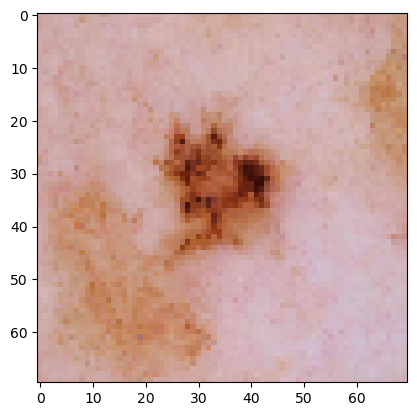

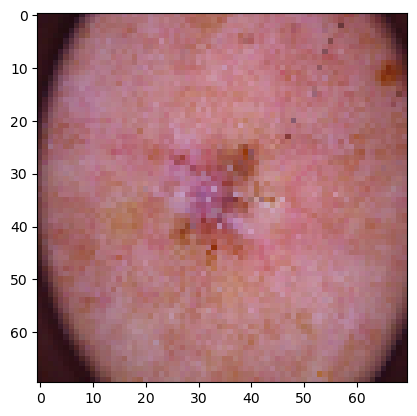

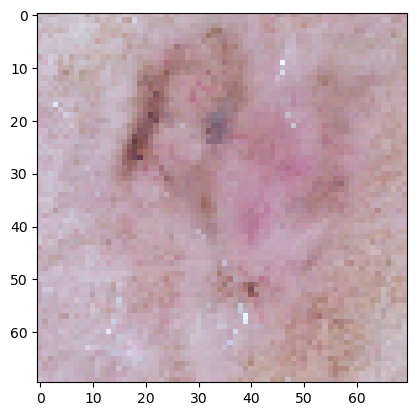

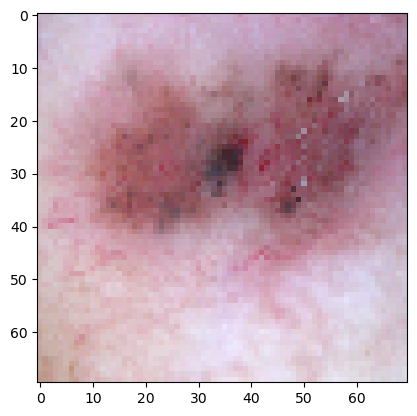

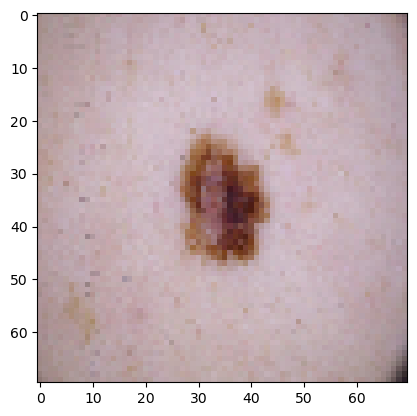

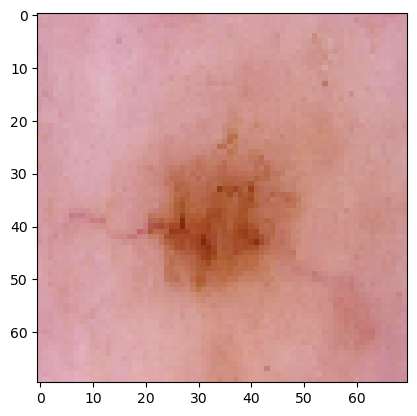

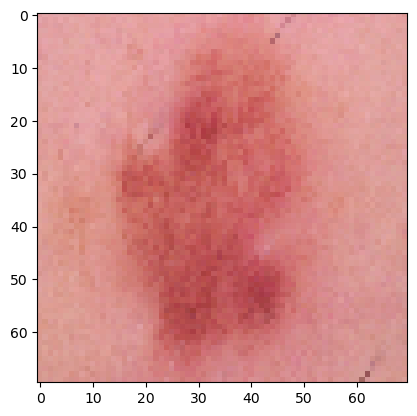

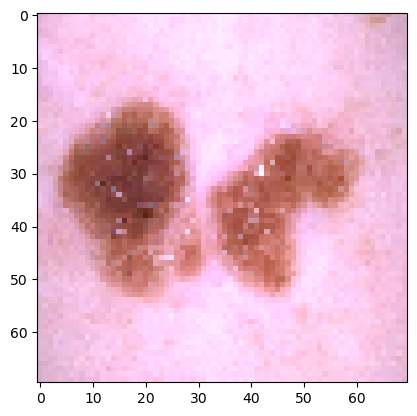

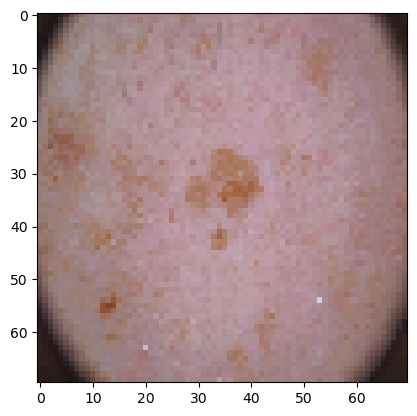

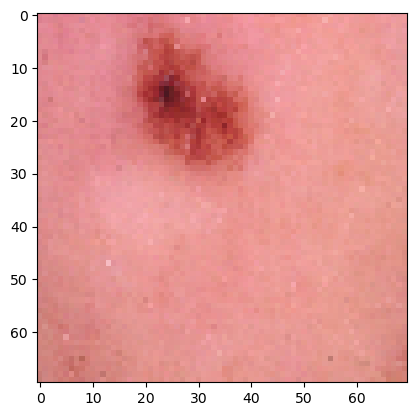

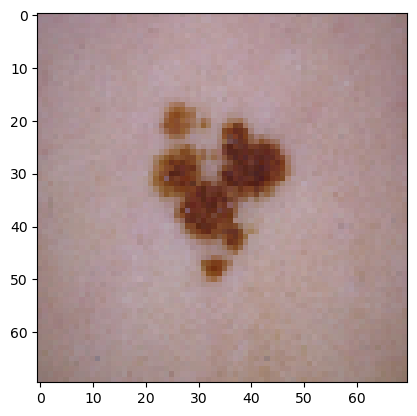

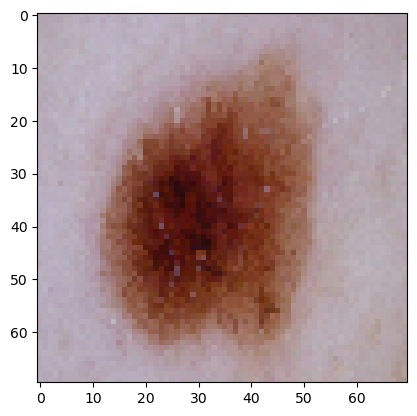

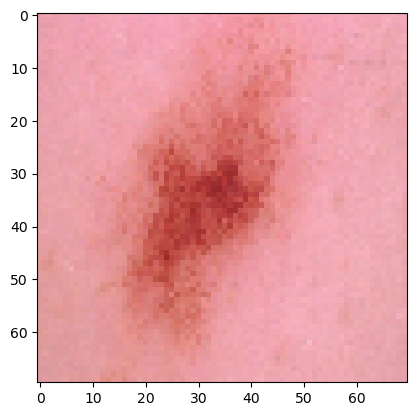

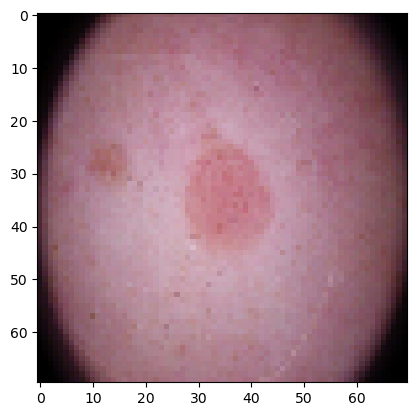

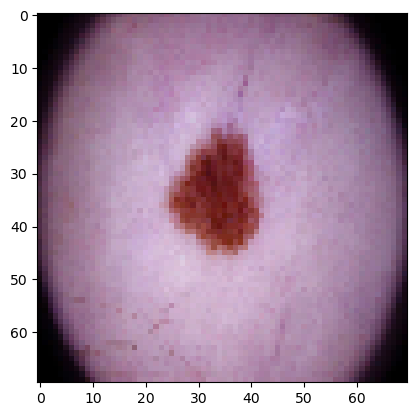

In [81]:
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show( )

In [23]:
import pandas as pd
import os
import

In [24]:
data_dir = os.getcwd() + "/dataverse_files/All_Data"

In [35]:
dest_dir = os.getcwd() + "/dataverse_files/Data_Sortet/"

In [36]:
skin_df2 = pd.read_csv(path + '/HAM10000_metadata.csv')

In [37]:
print(skin_df2['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [38]:
label = skin_df2['dx'].unique().tolist()

In [39]:
label_images = []

In [40]:
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + '/' + id + '.jpg'), (dest_dir + i + '/' + id+ '.jpg'))
    label_images = []